In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


In [2]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv", index_col = 'PassengerId')

In [3]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

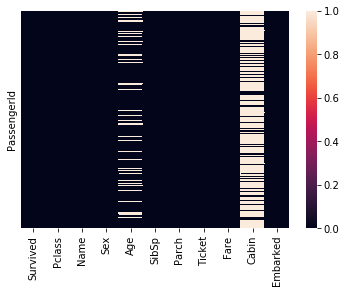

In [11]:
sns.heatmap(titanic_data.isnull(), yticklabels= False, )

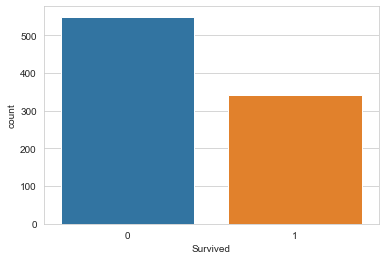

In [12]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data= titanic_data)

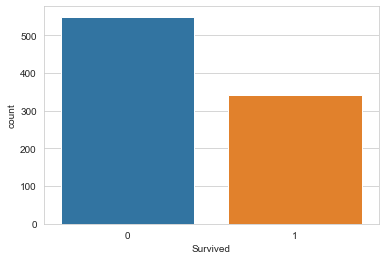

In [81]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", data= titanic_data)

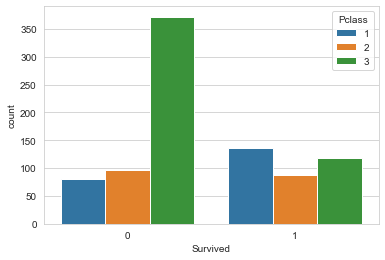

In [14]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue= 'Pclass', data= titanic_data)

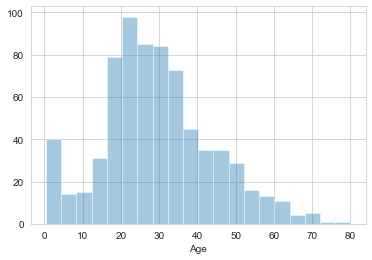

In [22]:
sns.distplot(titanic_data['Age'].dropna(), kde=False)

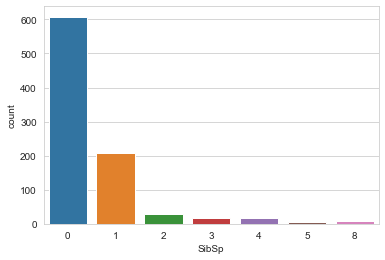

In [25]:
sns.countplot(x='SibSp', data= titanic_data)

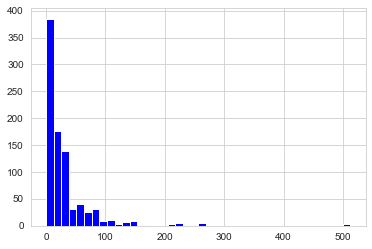

In [27]:
titanic_data['Fare'].hist(color='blue', bins=40)

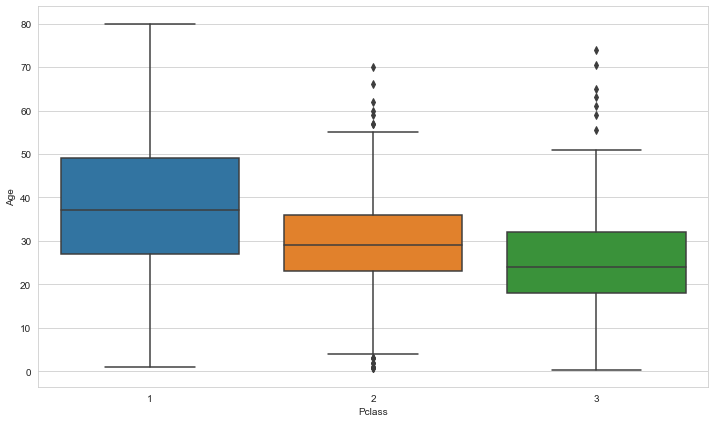

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y= 'Age', data=titanic_data)

In [30]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
    
        
    

In [31]:
titanic_data['Age']= titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)

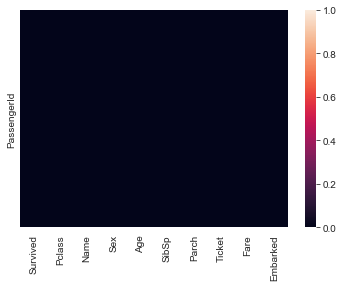

In [35]:
sns.heatmap(titanic_data.isnull(), yticklabels= False, )

In [34]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [36]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [43]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first= True )
embark=pd.get_dummies(titanic_data['Embarked'],drop_first= True )


In [47]:
titanic_data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1 ,inplace=True)

In [48]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [51]:
titanic_data=pd.concat([titanic_data,sex,embark], axis=1)

In [52]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
titanic_data.Survived.head(10)

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
X_titanic_data, X_test, Y_titanic_data, Y_test=train_test_split(titanic_data('Survived', axis=1),
                                                 titanic_data['Survived'], test_size= 0.30, random_state=101)

TypeError: 'DataFrame' object is not callable

In [59]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [64]:
titanic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1
889,0,3,24.0,1,2,23.4500,0,0,1


In [70]:
titanic_data.S.count()

891

In [75]:
titanic_data.Fare.nlargest(n=5)

PassengerId
259    512.3292
680    512.3292
738    512.3292
28     263.0000
89     263.0000
Name: Fare, dtype: float64